# Comparing two functions on a discretized grid

The fingerprint introduced in [doi:10.1038/s41597-022-01754-z](https://doi.org/10.1038/s41597-022-01754-z) can be used to compare two functions in a flexible and efficient way.

## How to create a grid

The generation of grids is described in more detail [here](fct-discretization.ipynb).
As an example we create two discretized axis and combine them into a ``DiscretizedGrid`` object:

In [1]:
from aim2dat.fct import DiscretizedAxis
from aim2dat.fct.fingerprint import FunctionDiscretizationFingerprint
import numpy as np
import matplotlib.pyplot as plt
import yaml

axis = DiscretizedAxis(axis_type="x", max=20, min=0, min_step=0.2, max_num_steps=1)
axis.discretization_method = "uniform"
axis.discretize_axis()

axis2 = DiscretizedAxis(axis_type="y", max=0.3, min=0, min_step=0.003, max_num_steps=1)
axis2.discretization_method = "uniform"
axis2.discretize_axis()

DiscretizedAxis
	axis_type: y
	max: 0.3
	min: 0
	min_step: 0.003
	max_num_steps: 1
	precision: 6
	discretization_method: _uniform_discretization


In [2]:
grid = axis + axis2
grid

In [3]:
grid.create_grid()

(1, 101)
(101, 101)


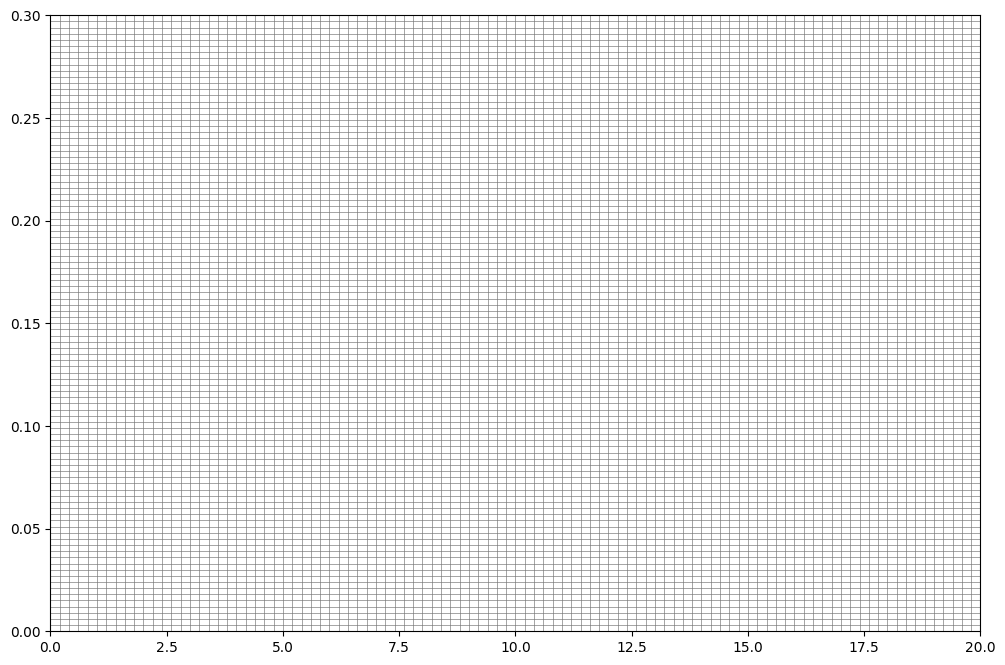

In [4]:
grid.plot_grid()

## Apply the fringerprint
First, show the example data. This DOS plot will be transferred to a discrete representation.

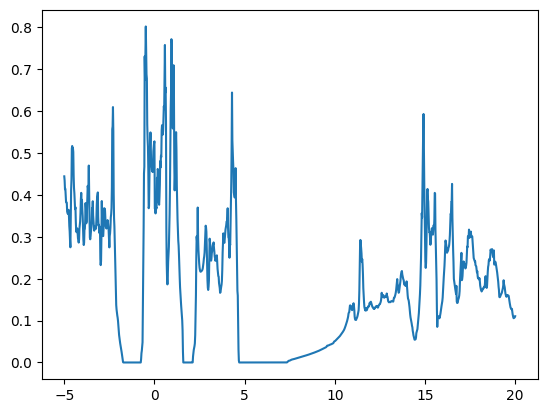

In [5]:
path = "files/function_analysis/"
with open(path + "example_energy_dos.yaml") as file:
    example_dos_energy, example_dos = np.array(yaml.safe_load(file))


plt.plot(example_dos_energy, example_dos)

### Create an instance of the `FunctionDiscretizationFingerprint` class
The class expects the grid as an input.

In [6]:
spectra_fp = FunctionDiscretizationFingerprint(grid=grid)

Calculate the fingerprint. The fingerprint will be stored in an internal dictionary in case a label is provided. The label is needed for the comparison of fingerprints.

In [7]:
fp = spectra_fp.calculate_fingerprint(example_dos_energy, example_dos, label="test")
fp

array([0., 0., 0., ..., 1., 1., 1.])

The fingerprint and grid can be visualized using the following method.

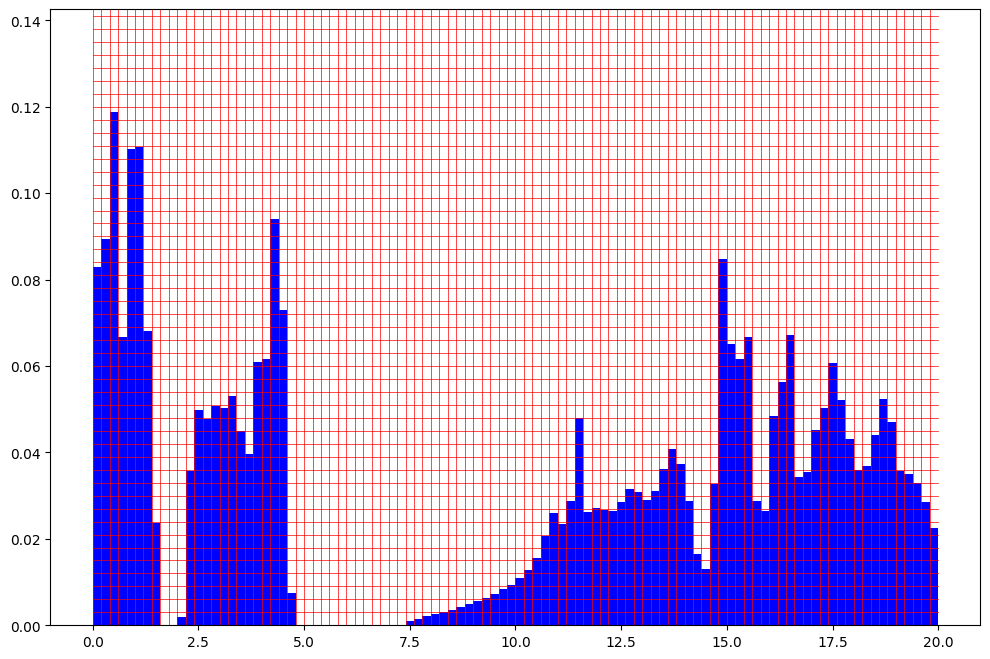

In [8]:
spectra_fp.plot_fingerprint(example_dos_energy, example_dos)

Shift the DOS as an example for a comparison.

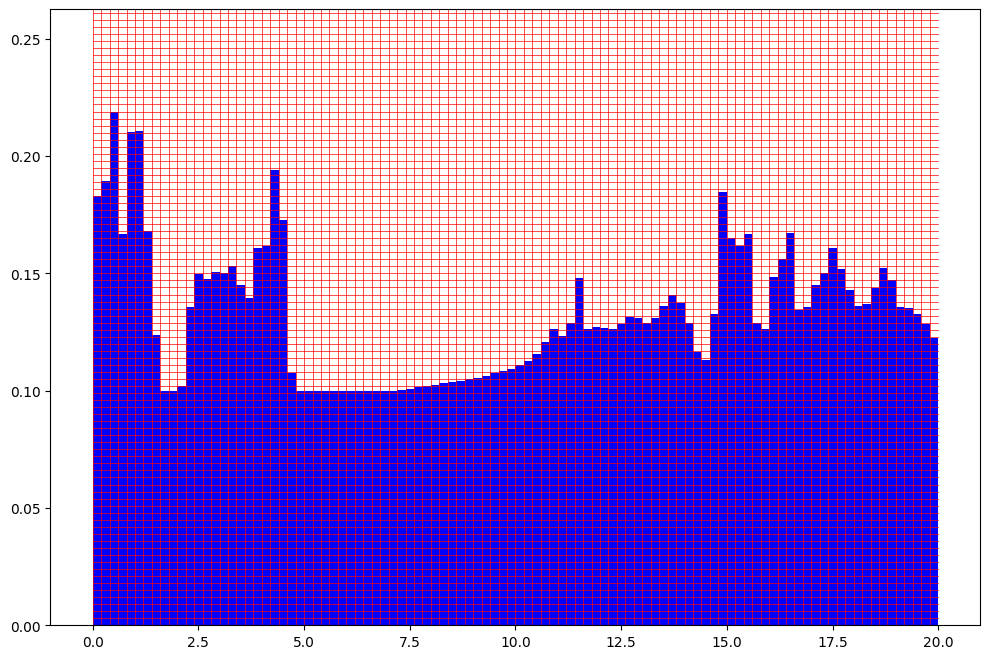

In [9]:
spectra_fp.plot_fingerprint(example_dos_energy, example_dos + 0.5)

In [10]:
fp_shifted = spectra_fp.calculate_fingerprint(
    example_dos_energy, example_dos + 0.5, label="test_shifted"
)

Compare the two fingerprints. The return value measures the similarity. A value of 1 indicates the highest similarity, 0 the lowest.

In [11]:
spectra_fp.compare_fingerprints("test", "test_shifted")

0.254196